In [30]:
"""
Project comments

Step 1: Analyze the data and problem.
    Data: Contains both categorical and continuous data. There may be techniques to learn with both types of data, 
        although I'm not familiar with them. Instead, I'll start by transforming the continuous data into categorical data 
        with the binning technique. I plan to use a histogram to find ideal points to bin, and may explore different bin points
        depending on the model efficiency-accuracy ratio.

    Problem 1: A relatively straightforward task - binary classification. The data provided includes both test and training data.
        I may split some of the training data to be validation data, as we move on with the model.

Step 2: First stab approach.
    0: Clean the data
    1: Detemine the best way to bin the categorical data. Analyze with histograms.
    2: dummy encode the two data sets
        a: Be sure for categorical data that it is properly binned, with reference to step 1.
        b: Be sure to append the class of data according to the ML model requirements.
        c: Split off ~20% of the training data to be validation data
    3: Create a machine learning model(preferably Keras, though Theano is viable)
    4: Run the training data.
    5: Check initial statistics. Improve model design at step 3 if required, documenting the changes.
    6: When model is working well, re-apply accuracy test, AUROC test, and confusion matrix.
    7: Document the work and results.
    8*: Repeat earlier steps provided time. See if other improvements can be done.

"""

"\nProject comments\n\nStep 1: Analyze the data and problem.\n    Data: Contains both categorical and continuous data. There may be techniques to learn with both types of data, \n        although I'm not familiar with them. Instead, I'll start by transforming the continuous data into categorical data \n        with the binning technique. I plan to use a histogram to find ideal points to bin, and may explore different bin points\n        depending on the model efficiency-accuracy ratio.\n\n    Problem 1: A relatively straightforward task - binary classification. The data provided includes both test and training data.\n        I may split some of the training data to be validation data, as we move on with the model.\n\nStep 2: First stab approach.\n    0: Clean the data\n    1: Detemine the best way to bin the categorical data. Analyze with histograms.\n    2: dummy encode the two data sets\n        a: Be sure for categorical data that it is properly binned, with reference to step 1.\n  

In [31]:
"""
Aunalytics Data Engineering, "au-train, au-test" datasets.
Approach: dummy encoding with binning (histogram) on continuous data.

Assumptions: Unknown data (marked with '?') will be dropped entirely.
"""

'\nAunalytics Data Engineering, "au-train, au-test" datasets.\nApproach: dummy encoding with binning (histogram) on continuous data.\n\nAssumptions: Unknown data (marked with \'?\') will be dropped entirely.\n'

In [32]:
import pandas as pd
import numpy as np
import re

######################
# 0. Clean the Data  #
######################

# Get the data into python with Pandas
data = pd.read_csv("au_train.csv", header=0)
testData = pd.read_csv("au_test.csv", header=0)
print ("original data", data.shape)


# check for and remove duplicates
data = data.drop_duplicates()
testData = testData.drop_duplicates()
print("deduped size", data.shape)


# remove data with missing attributes. Any '?' will be removed
data = data.replace(to_replace=re.compile("\?"), value=np.NaN)
testData = testData.replace(to_replace=re.compile("\?"), value=np.NaN)
#print (data2)
data = data.dropna(axis=0, how='any')
testData = testData.dropna(axis=0, how='any')
print ("without missing data", data.shape)
print ("test without missing data", testData.shape)


# Check for and remove crazy ages (negative and anthing older than 130)
data = data.query('age <= 130')
testData = testData.query('age <= 130')
data = data.query('age > 0')
testData = testData.query('age > 0')
print ("without bad ages", data.shape)

# rename inconvenient column names (due to hyphen ('-') being reguarded as a subtraction symbol)
data = data.rename(index=str, columns={"education-num":"education_num", "capital-gain":"capital_gain", "capital-loss":"capital_loss", "hours-per-week":"hours_per_week"})
testData = testData.rename(index=str, columns={"education-num":"education_num", "capital-gain":"capital_gain", "capital-loss":"capital_loss", "hours-per-week":"hours_per_week"})

# Check for and remove negative amounts (fnlwgt, education-num, capital-gain, capital-loss, hours-per-week)
data = data.query('fnlwgt > 0')
data = data.query('education_num > 0')
data = data.query('capital_gain >= 0')
data = data.query('capital_loss >= 0')
data = data.query('hours_per_week >= 0')

testData = testData.query('fnlwgt > 0')
testData = testData.query('education_num > 0')
testData = testData.query('capital_gain >= 0')
testData = testData.query('capital_loss >= 0')
testData = testData.query('hours_per_week >= 0')
print ("without negative amounts", data.shape)





original data (32561, 15)
deduped size (32537, 15)
without missing data (30139, 15)
test without missing data (15055, 15)
without bad ages (30139, 15)
without negative amounts (30139, 15)


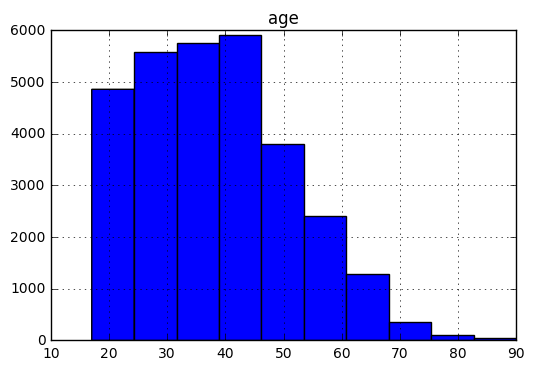

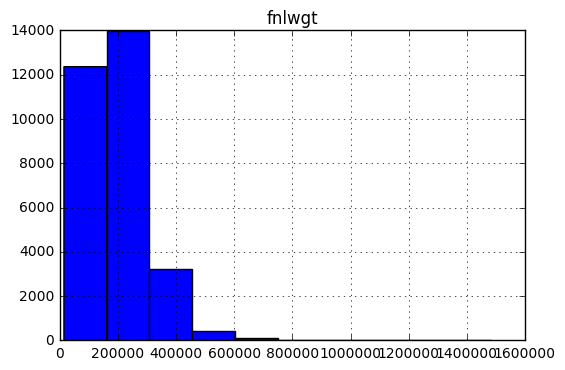

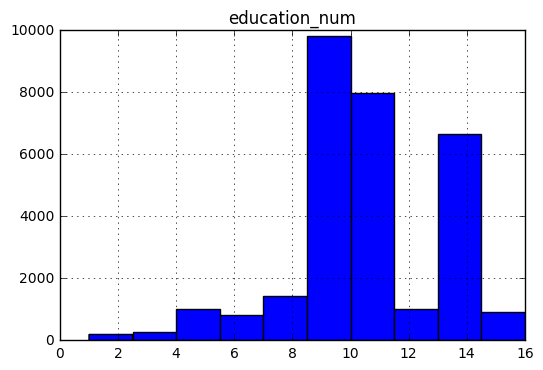

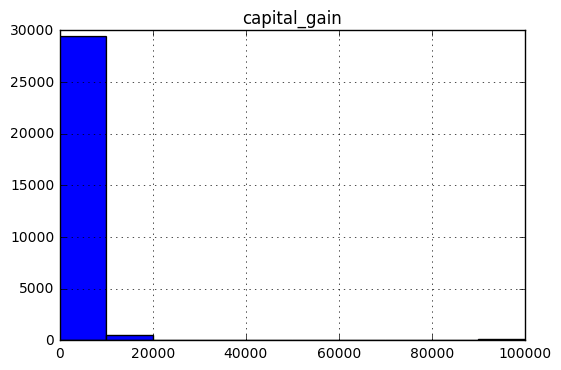

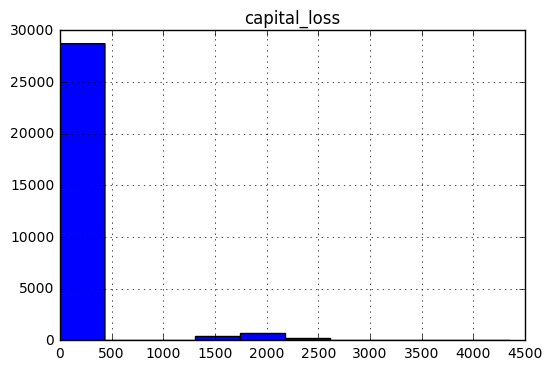

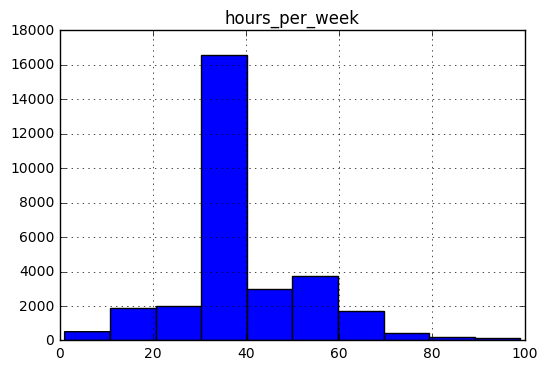

In [33]:
###############################################
#  1a. Determine binning for continuous data  #
###############################################

#  We need to look at columns 'age', 'fnlwgt', 'education-num', 
# 'capital-gain', 'capital-loss', and 'hours-per-week'
#  Which are cols 0, 2, 4, 10, 11, 12

# Pandas has a function for this! --> Pandas.cut()
# I'll still use a histogram to see how the data looks (and see if anything is fishy...)

import matplotlib.pyplot as plt

plt.show(data.hist(column=0))
plt.show(data.hist(column=2))
plt.show(data.hist(column=4))
plt.show(data.hist(column=10))
plt.show(data.hist(column=11))
plt.show(data.hist(column=12))



In [34]:
####################################
# 1b. Binning the continuous data  #
####################################

# REMOVED: The attempt to bin and categorize the continuous data was abandoned in favor of using dummy variables on the categorical data

# NOTE: There are ways to use two ML models to represent categorical and continuous data, although I'm not yet familiar with them.
#       There may also be other ways of representing the data beyond one-hot or dummy encoding, although I'm not familiar with those.

#  We need to look at columns 'age', 'fnlwgt', 'education-num', 
# 'capital-gain', 'capital-loss', and 'hours-per-week'
#  Which are cols 0, 2, 4, 10, 11, 12

# Bin the continuous data and store in the Pandas Dataframe
#data['binned_age'] = pd.cut(data['age'], bins=12) 
#data['binned_fnlwgt'] = pd.cut(data['fnlwgt'], bins=10) 
# data['binned_education_num'] = pd.cut(data['education_num'], bins=16) will just use the number as a category
#data['binned_capital_gain'] = pd.cut(data['capital_gain'], bins=5) 
#data['binned_capital_loss'] = pd.cut(data['capital_loss'], bins=5) 
#data['binned_hours_per_week'] = pd.cut(data['hours_per_week'], bins=10) 

# Do the same with the test data...
#testData['binned_age'] = pd.cut(testData['age'], bins=12) 
#testData['binned_fnlwgt'] = pd.cut(testData['fnlwgt'], bins=10) 
# testData['binned_education_num'] = pd.cut(testData['education_num'], bins=16) will just use the number as a category
#testData['binned_capital_gain'] = pd.cut(testData['capital_gain'], bins=5) 
#testData['binned_capital_loss'] = pd.cut(testData['capital_loss'], bins=5) 
#testData['binned_hours_per_week'] = pd.cut(testData['hours_per_week'], bins=10) 


#print ("Data with new 5 columns...", data.shape)
#print (list(data.columns.values))


In [35]:
##############################
# 2a. Dummy Encode the Files  #
##############################


def dummy_encode(data, columns, concatColumns):
    """
    @param data: a pandas dataframe
    @param columns: a list of strings of the files to dummy_encode
    @return returnData: a pandas dataframe with the dummy encoded data
    
    """
    print('Beginning encoding.')
    returnData = pd.DataFrame() # create the return variable
    for value in columns:
        print ("encoding ", value, "...")
        dummies = pd.get_dummies(data[value], prefix=value, drop_first=False) #use built in dummy encoding
        print ("dummy shape ", dummies.shape)
        returnData = pd.concat([returnData, dummies], axis=1)
    for val in concatColumns:
        # normalize the continuous data
        print ("encoding ", val, "...")
        val_norm = (data[val] - data[val].min()) / (data[val].max() - data[val].min())
        returnData = pd.concat([returnData, val_norm], axis=1)
    print ('encoding complete.')
    return returnData


# extract out only the columns we are going to run
# colsToEncode are categorical variables that we need to dummy encode. 
# coldToConcat are appended to the return of the method above, and also normalized (continuous variables)
colsToEncode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',  'class'] # removed 'native-country',
colsToConcat = ['education_num', 'age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']
dataDummy = dummy_encode(data, colsToEncode, colsToConcat)
testDummy = dummy_encode(testData, colsToEncode, colsToConcat)
print ("Encoded data shape: ", dataDummy.shape)
print ("test Encoded data shape: ", testDummy.shape)


print (dataDummy[:0])
print (testData['class'])
print (testDummy['class_ >50K.'])





Beginning encoding.
encoding  workclass ...
dummy shape  (30139, 7)
encoding  education ...
dummy shape  (30139, 16)
encoding  marital-status ...
dummy shape  (30139, 7)
encoding  occupation ...
dummy shape  (30139, 14)
encoding  relationship ...
dummy shape  (30139, 6)
encoding  race ...
dummy shape  (30139, 5)
encoding  sex ...
dummy shape  (30139, 2)
encoding  class ...
dummy shape  (30139, 2)
encoding  education_num ...
encoding  age ...
encoding  fnlwgt ...
encoding  capital_gain ...
encoding  capital_loss ...
encoding  hours_per_week ...
encoding complete.
Beginning encoding.
encoding  workclass ...
dummy shape  (15055, 7)
encoding  education ...
dummy shape  (15055, 16)
encoding  marital-status ...
dummy shape  (15055, 7)
encoding  occupation ...
dummy shape  (15055, 14)
encoding  relationship ...
dummy shape  (15055, 6)
encoding  race ...
dummy shape  (15055, 5)
encoding  sex ...
dummy shape  (15055, 2)
encoding  class ...
dummy shape  (15055, 2)
encoding  education_num ...
enc

In [36]:
##########################################
# 2b. Move the data Class appropriately  #
##########################################


# NOTE: In this step, we determine that the positive class is 'class_ <=50K'


# remove one of the two columns (the second created when we dummy encoded) for the class data. 
# Retain the other column for class information
dataDummy = dataDummy.drop(axis=1, labels=['class_ >50K'])
print ("new shape after dropping columns", dataDummy.shape)


# move the remaining class column to the front of the data (to make using it easier later)
dummyColNames = list(dataDummy)
dummyColNames.insert(0, dummyColNames.pop(dummyColNames.index('class_ <=50K')))
dataDummy = dataDummy.loc[:, dummyColNames]

print ("new shape after moving columns", dataDummy.shape)

# repeat for test data.
testDummy = testDummy.drop(axis=1, labels=['class_ >50K.'])

dummyColNames2 = list(testDummy)
dummyColNames2.insert(0, dummyColNames2.pop(dummyColNames2.index('class_ <=50K.')))
testDummy = testDummy.loc[:, dummyColNames2] # Positive class is 'class_ <=50K.'

print ("testDummy after drops", testDummy.shape)

new shape after dropping columns (30139, 64)
new shape after moving columns (30139, 64)
testDummy after drops (15055, 64)


In [37]:
###################################
# 2c. Split off a Validation set  #
###################################

# Skipping this step ATM. 

In [38]:
###################################################
# 3-5. Create, Run, Improve a Keras Dense Model   #
###################################################
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adagrad, RMSprop


# NOTE: There is a code dump by Keras at the start of running the model. This dump can
#       obscure the running information, i.e. it can look like it err'd out, but hasn't.


def keras_dense_model():
    model = Sequential()
    model.add(Dense(63, input_shape=(63,)))
    model.add(Activation('relu')) # rectified linear units performs better than sigmoid/tanh in deeper models
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(.1))
           
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(.05))
    
    model.add(Dense(8))
    model.add(Activation('relu'))
        
    model.add(Dense(1))
    model.add(Activation('sigmoid')) # we want a 0 or 1 classified
  
    optim = Adagrad(lr=0.07, epsilon=1e-08)
    #optim = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
    
    model.compile(loss='binary_crossentropy', optimizer = optim)

    return model

# break apart the dummy encoded data into a data matrix (x_train) and a class matrix (y_train)
y_train = dataDummy.iloc[:, 0]
print (y_train.shape)
x_train = dataDummy.iloc[:, 1:]
print (x_train.shape)

# create and then run the Keras Dense model
mlModel = keras_dense_model()
mlModel.fit(x_train.values, y_train, nb_epoch=64, batch_size=16)

print("done fitting")



(30139,)
(30139, 63)
Epoch 1/64
30139/30139 [==============================] - 0s - loss: 0.3612     
Epoch 2/64
30139/30139 [==============================] - 0s - loss: 0.3361     
Epoch 3/64
30139/30139 [==============================] - 0s - loss: 0.3266     
Epoch 4/64
30139/30139 [==============================] - 0s - loss: 0.3210     
Epoch 5/64
30139/30139 [==============================] - 0s - loss: 0.3176     
Epoch 6/64
30139/30139 [==============================] - 0s - loss: 0.3147     
Epoch 7/64
30139/30139 [==============================] - 0s - loss: 0.3112     
Epoch 8/64
30139/30139 [==============================] - 0s - loss: 0.3087     
Epoch 9/64
30139/30139 [==============================] - 0s - loss: 0.3066     
Epoch 10/64
30139/30139 [==============================] - 0s - loss: 0.3046     
Epoch 11/64
30139/30139 [==============================] - 0s - loss: 0.3023     
Epoch 12/64
30139/30139 [==============================] - 0s - loss: 0.3002     
Epoc

(15055,)
(15055, 63)
 8608/15055 [================>.............] - ETA: 0s

Test Data Loss: 0.4163504302264131

Model Accuracy:  83.8591829956825 %

Model AUROC:  0.8879311173789377
Confusion Matrix: 
 [[ 2439  1261]
 [ 1169 10186]]

True Negative: 2439
False Positive: 1261
False Negative: 1169
True Positive: 10186

Model Precision:  88.98401327858828 %
Model Recall:  89.70497578159402 %

---------------------------------------------


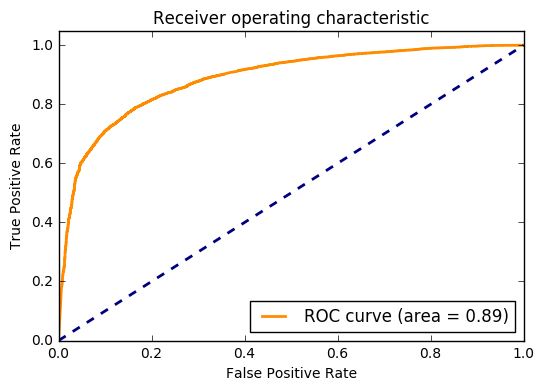

In [39]:
#############################################
# 6. Analyze Keras ML Model with Test Data  #
#############################################
from sklearn import metrics

# slice the testDummy dataFrame for class matrix and data matrix
y_test = testDummy.iloc[:, 0]
print (y_test.shape)
x_test = testDummy.iloc[:, 1:]
print (x_test.shape)

# Find the Loss for the test data (using Keras evaluation)
testDataLoss = mlModel.evaluate(x_test.values, y_test, batch_size=32)
print ("\n\nTest Data Loss:", testDataLoss)

# Obtain the predictions for the model to compare against the ground truth (AUROC, Confusion matrix)
testDataPredictions = mlModel.predict(x_test.values)
#print ("\n\nTest Predictions\n", testDataPredictions)

# obtain the accuracy score for the model
testAccuracy = metrics.accuracy_score(y_test, testDataPredictions.round(), normalize=True)
print ("\nModel Accuracy: ", testAccuracy*100.0, "%")

# obtain the AUC for the model
testAUC = metrics.roc_auc_score(y_test, testDataPredictions)
print ("\nModel AUROC: ", testAUC)

# obtain confusion matrix details
confusionMatrix = metrics.confusion_matrix(y_test, testDataPredictions.round())
print ("Confusion Matrix: \n", confusionMatrix)
print ("\nTrue Negative:", confusionMatrix[0,0])
print ("False Positive:", confusionMatrix[0,1])
print ("False Negative:", confusionMatrix[1,0])
print ("True Positive:", confusionMatrix[1,1])

testPrecision = confusionMatrix[1,1]/((confusionMatrix[1,1]+confusionMatrix[0,1])*1.0) # of those that were 'positive', how many of them really are positive?
testRecall = confusionMatrix[1,1]/((confusionMatrix[1,1] + confusionMatrix[1,0])*(1.0)) # of true positives in the pool, how many did we pull out?
print ("\nModel Precision: ", testPrecision*100, "%")
print ("Model Recall: ", testRecall*100, "%")
print("\n---------------------------------------------")





##################################################################
# display the AUROC curve. Code modified from scikit-learn (http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
falsePositiveRate, truePositiveRate, _ = metrics.roc_curve(y_test, testDataPredictions)
dataROCAUC = metrics.auc(falsePositiveRate, truePositiveRate)

plt.figure()
plt.plot(falsePositiveRate, truePositiveRate, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % dataROCAUC)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()






In [40]:
#########################
# 7. Summarize Results  #
#########################

"""
The model, trained in 64 epochs with 7 dense layers using Adagrad optimization and a binary_crossentropy 
loss function, coupled with intermitent Dropout to guard against overfitting and a Rectified Linear Units
activation function to guard against diminishing returns for deeper networks (as compared to sigmoid activation functions),
the model performs at a 74.94% accuracy when exposed to the test set of data.
This could be improved upon by changing the model type, adding an ensemble to handle both continuous and categorical data,
transforming the data or creating a new boolean value, etc.

More specifically, this came from a 0.52 Area Under Reciever Operating Characterisics (AUROC) Curve, 
which plots the true positives against the false positives, providing an insight to the true ability of the model. 
In this case, indicating that there is only slightly better than random chance at assigning correctly a positive result,
a very very poorly performing model.

The confusion matrix for this model and test data also demonstrate this, showing a larger proportion of false positives 
than false negatives (an overeager, overaccepting model). 

A decent level of precision and high recall, meaning that of those labeled 'positive' by the model,
77.33% of them were indeed true positives, and that of all true positives within the test set 95.12% 
of them were successfully recovered.


Given the time, I was unable to complete a k-fold cross verification study on the model, although given
the amount of data provided such a study seemed at first unneccesary (the k-fold allows smaller datasets to be evaluated at a
higher degree of certainty). With the results of the model, however, additional data would be one of the steps
to obtaining a better performing model (though not the first step).

Given some time to research, creating an ensemble model would be one of the first improvements I would attempt, as
well as walking through the data to see how best to transform it (create new derivative features, remove unnessecary features, etc).



"""

"\nThe model, trained in 64 epochs with 7 dense layers using Adagrad optimization and a binary_crossentropy \nloss function, coupled with intermitent Dropout to guard against overfitting and a Rectified Linear Units\nactivation function to guard against diminishing returns for deeper networks (as compared to sigmoid activation functions),\nthe model performs at a 74.94% accuracy when exposed to the test set of data.\nThis could be improved upon by changing the model type, adding an ensemble to handle both continuous and categorical data,\ntransforming the data or creating a new boolean value, etc.\n\nMore specifically, this came from a 0.52 Area Under Reciever Operating Characterisics (AUROC) Curve, \nwhich plots the true positives against the false positives, providing an insight to the true ability of the model. \nIn this case, indicating that there is only slightly better than random chance at assigning correctly a positive result,\na very very poorly performing model.\n\nThe confus